# Mounting the GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


# Installing the Packages for Language Detection, KTrain

In [ ]:
pip install langdetect

In [ ]:
!pip3 install ktrain

# Import required Modules for Dataset Preprocessing and Visualization


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
import string

from sklearn import preprocessing
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import word_tokenize
from langdetect import detect
from wordcloud import WordCloud
import gensim
import spacy
from spacy.lang.en import English

stopwords = stopwords.words('english')
nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation
parser = English()


# Import required Modules for Model Building

In [ ]:
#Traditional ML

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#Deep Learning
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
#Bert Model using KTrain
import ktrain
from ktrain import text

# Dataset Preprocessing and Visualization

In [ ]:
capstone_project_path =  '/content/drive/My Drive/Colab Notebooks/NLP/Capstone/'

In [ ]:
incidentReport = pd.read_excel(os.path.join(capstone_project_path,'input_data.xlsx'))

In [ ]:
incidentReport.head(10)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0


In [ ]:
incidentReport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
incidentReport.shape

(8500, 4)

In [ ]:
incidentReport.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

In [ ]:
incidentReport['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [ ]:
incidentReport[incidentReport.isnull().any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [ ]:
incidentReport.dropna(inplace=True)
incidentReport.shape

(8491, 4)

In [ ]:
incidentReportCopy = incidentReport[['Short description', 'Description', 'Caller', 'Assignment group']].copy()

In [ ]:
incidentReportCopy[incidentReportCopy.duplicated()]

,Short description,Description,Caller,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
667,job bkbackup_tool_powder_prod_full failed in j...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
...,...,...,...,...
7836,probleme mit erpgui \tmqfjard qzhgdoua,probleme mit erpgui \tmqfjard qzhgdoua,tmqfjard qzhgdoua,GRP_24
8051,issue on pricing in distributor_tool,we have agreed price with many of the distribu...,hbmwlprq ilfvyodx,GRP_21
8093,reset passwords for prgthyuulla ramdntythanjes...,the,boirqctx bkijgqry,GRP_17
8347,blank call // loud noise,blank call // loud noise,rbozivdq gmlhrtvp,GRP_0


In [ ]:
incidentReportUpdated = incidentReportCopy.drop_duplicates(['Short description', 'Description', 'Caller', 'Assignment group'],ignore_index=True)

In [ ]:
incidentReportUpdated.shape

(8408, 4)

In [ ]:
# Print number of Assignment Group & shape
print("Asignment Group: " + str(incidentReportUpdated['Assignment group'].nunique()))

Asignment Group: 74


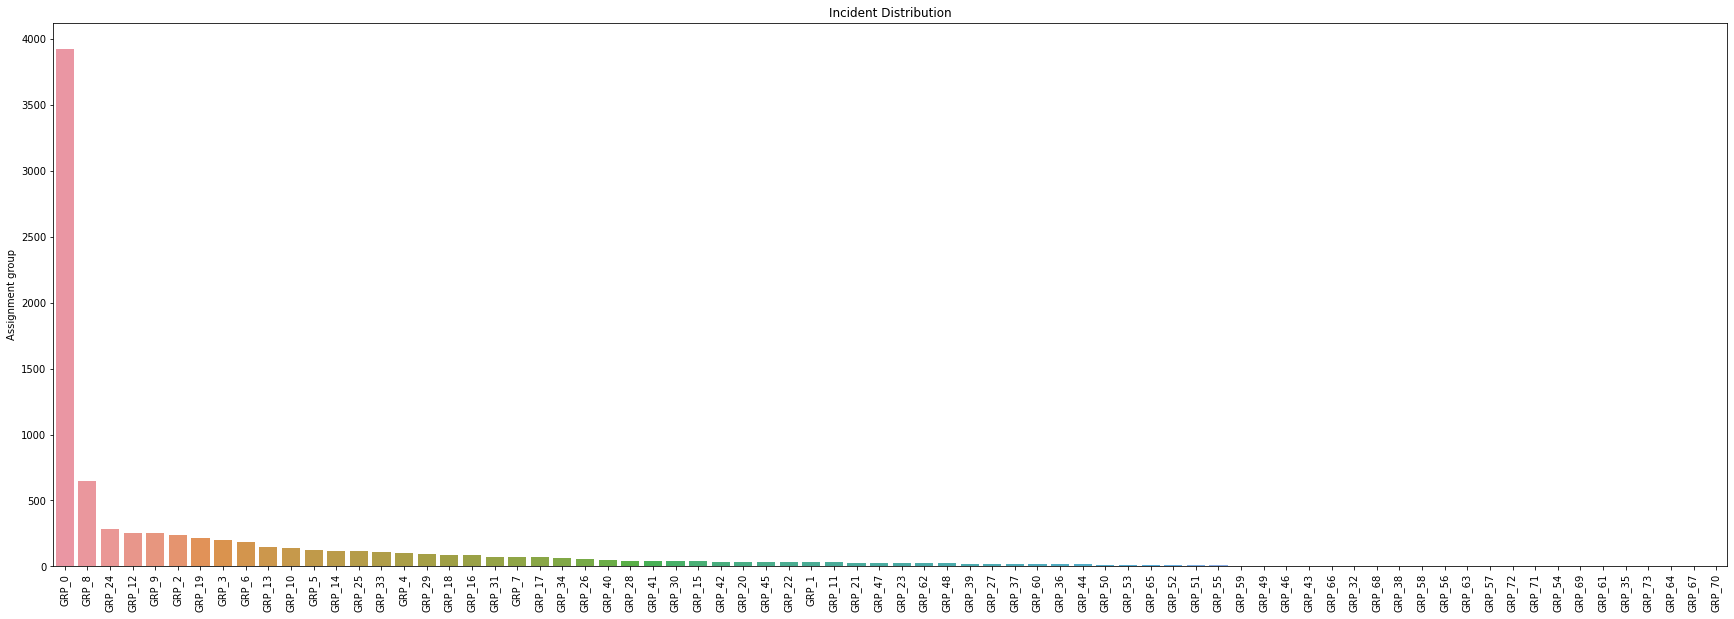

In [ ]:
# Plot the Assignment Groups
fig = plt.figure(figsize=(30,10))
sns.barplot(incidentReportUpdated['Assignment group'].value_counts().index, incidentReportUpdated['Assignment group'].value_counts())
plt.xticks(rotation=90)
plt.title('Incident Distribution')
plt.show()

In [ ]:
incidentReportDescrpConcat = pd.DataFrame({"Description": incidentReportUpdated["Short description"] + " " + incidentReportUpdated["Description"],
                             "Caller":incidentReportUpdated["Caller"], "AssignmentGroup": incidentReportUpdated["Assignment group"]}, 
                                                       columns=["Description","Caller","AssignmentGroup"])

In [ ]:
incidentReportDescrpConcat.shape

(8408, 3)

In [ ]:
incidentReportDescrpConcat.head()

,Description,Caller,AssignmentGroup
0,login issue -verified user details.(employee# ...,spxjnwir pjlcoqds,GRP_0
1,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn \r\n\r\nreceived from: eylq...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page unable to access...,xbkucsvz gcpydteq,GRP_0
4,skype error skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
incidentReportDescrpConcatCopy = incidentReportDescrpConcat[['Description', 'Caller', 'AssignmentGroup']].copy()
incidentReportDescrpConcatCopy[incidentReportDescrpConcatCopy.duplicated()]

,Description,Caller,AssignmentGroup


In [ ]:
#incidentReportUpdatedConcatenated.to_excel("incidentReportUpdatedConcatenated.xlsx")

In [ ]:
assignmentGroup = list(incidentReportDescrpConcat['AssignmentGroup'].value_counts().index)

In [ ]:
#pd.set_option('display.max_rows', None)

In [ ]:
incidentReportDescrpConcatGrp = incidentReportDescrpConcat.groupby(['AssignmentGroup']).size().reset_index(name='Counts')
incidentReportDescrpConcatGrp

,AssignmentGroup,Counts
0,GRP_0,3926
1,GRP_1,31
2,GRP_10,140
3,GRP_11,30
4,GRP_12,257
...,...,...
69,GRP_71,2
70,GRP_72,2
71,GRP_73,1
72,GRP_8,645


In [ ]:
#incidentReportDescrpConcatGrp.loc[incidentReportDescrpConcatGrp['Counts'] > 1] 

In [ ]:
incidentReportDescrpConcatGrp.describe()

,Counts
count,74.000000
mean,113.621622
std,459.823990
min,1.000000
25%,5.250000
50%,26.000000
75%,81.000000
max,3926.000000


**KTrain Translators for German, French, Africanas, Italian, Spanish and Russian**

In [ ]:
ru_translator = text.EnglishTranslator(src_lang='ru')
de_translator = text.EnglishTranslator(src_lang='de')
af_translator = text.EnglishTranslator(src_lang='af')
fr_translator = text.EnglishTranslator(src_lang='fr')
es_translator = text.EnglishTranslator(src_lang='es')
it_translator = text.EnglishTranslator(src_lang='it')

In [ ]:
#1) Create list of regex to remove sensitive data
def getRegexList():
    regexList = []
    regexList += ['received from:(.*)\r\n']  # from line
    regexList += ['From:(.*)\r\n']  # from line
    regexList += ['Sent:(.*)\r\n']  # sent to line
    regexList += ['Received:(.*)\r\n']  # received data line
    regexList += ['To:(.*)\r\n']  # to line
    regexList += ['CC:(.*)\r\n']  # cc line
    regexList += ['p please do not print this email unless it is absolutely necessary. spread environmental awareness.']  # footer
    regexList += ['confidentiality caution: this communication (including any accompanying documents) is intended(.*)the original communication immediately.']  # footer
    regexList += ['confidentiality caution  this communication  including any accompanying documents  is intended(.*)the original communication immediately ']  # footer
    regexList += ['\[cid:(.*)]']  # images cid
    regexList += ['Subject:']
    regexList += ['^[_a-z0-9-]+(\.[_a-z0-9-]+)*@[a-z0-9-]+(\.[a-z0-9-]+)*(\.[a-z]{2,4})$']
    regexList += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+']
    regexList += ['[^a-zA-Z]']

    return regexList

#2) Convert to LowerCase and regular expression search with replacement
def removeString(data, regex):
    return data.str.lower().str.replace(regex.lower(), ' ')

#3) Clean dataset and remove sensitive data
def cleanDataset(dataset, columnsToClean, regexList):
    for column in columnsToClean:
        for regex in regexList:
            dataset[column] = removeString(dataset[column], regex)
    return dataset


#4) Translating Sentences to English
# If sentences begin with English word translation will not happen
# Translations only for German, Italian, Spanish, French, Africanas and Rssian
def translateToEnglishSentences(sentence):
    try:
      lang = detect(sentence)
      print (sentence)
      print (lang)
      if lang == 'en':
          sentences = sentence
      elif lang == 'ru':
          sentences = ru_translator.translate(sentence)
      elif lang == 'de':
          sentences = de_translator.translate(sentence)
      elif lang == 'af':
          sentences = af_translator.translate(sentence)
      elif lang == 'fr':
          sentences = fr_translator.translate(sentence)
      elif lang == 'es':
          sentences = es_translator.translate(sentence)
      elif lang == 'it':
          sentences = it_translator.translate(sentence)
    except Exception as e:
      print(str(e))
    print (sentences)
    return sentences

#5) Stemming and removing stopwords
def cleanUpText(dataset, columnsToClean):
    temp =[]
    snow = SnowballStemmer('english')
    for column in columnsToClean:
        for sentence in dataset[column]:
            words = [snow.stem(word) for word in sentence.split() if word not in stopwords]   # Stemming and removing stopwords
            temp.append(words)
         
    dataset = temp
    return dataset

#6) Removing personal pronouns, stopwords, and punctuation - Lemmatization
def cleanup_text(docs, columnsToClean,logging=False):
    texts = []
    counter = 1
    for column in columnsToClean:
      for doc in docs[column]:
          if counter % 1000 == 0 and logging:
              print("Processed %d out of %d documents." % (counter, len(docs)))
          counter += 1
          doc = nlp(doc, disable=['parser', 'ner'])
          tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
          tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
          tokens = ' '.join(tokens)
          texts.append(tokens)
      
    docs = texts    
    return docs

#7) Function for Word Tokenzing
def tokenize(text):
    words = word_tokenize(text)
    return words

#8) Translate to English Sentences
def translateToEnglishSent(dataset, columnsToTranslate):
    #translator = Translator(to_lang="en")
    temp = []
    for column in columnsToTranslate:
        for sentence in dataset[column]:
            try:
              lang = detect(sentence)
              print (sentence)
              print (lang)
              if lang == 'en':
                  sentences = sentence
              #elif lang == 'zh':
              #    words = ch_translator.translate(word)
              #elif lang == 'ar':
              #    words = ar_translator.translate(word)
              elif lang == 'ru':
                  sentences = ru_translator.translate(sentence)
              elif lang == 'de':
                  sentences = de_translator.translate(sentence)
              elif lang == 'af':
                  sentences = af_translator.translate(sentence)
              elif lang == 'fr':
                  sentences = fr_translator.translate(sentence)
              elif lang == 'es':
                  sentences = es_translator.translate(sentence)
              elif lang == 'it':
                  sentences = it_translator.translate(sentence)
              #elif lang == 'pt':
              #    words = pt_translator.translate(word)      
            except Exception as e:
              print(str(e))
              continue
            print (sentences)
            temp.append(sentences)     
    dataset = temp
    return dataset


**WordCloud before cleaning the data set**

In [ ]:
vocabulary = set()
for sentence in incidentReportDescrpConcat['Description']:
    words = tokenize(sentence)
    vocabulary.update(words)
 
vocabulary = list(vocabulary)
word_index = {w: index for index, w in enumerate(vocabulary)}
 
VOCABULARY_SIZE = len(vocabulary)
DOCUMENTS_COUNT = len(incidentReportDescrpConcat['Description'])
 
print(VOCABULARY_SIZE, DOCUMENTS_COUNT)

14550 8408


In [ ]:
vocabulary_wc=' '.join(map(str, vocabulary))

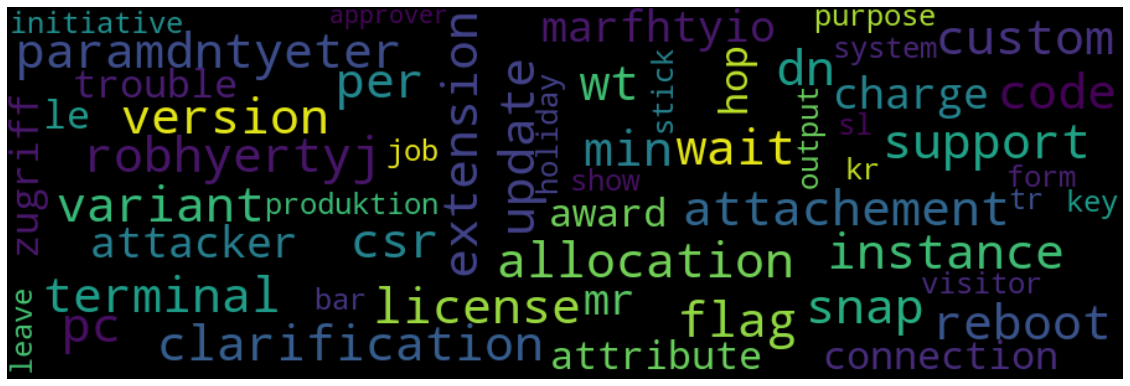

In [ ]:
wc = WordCloud(width=900, height=300, max_font_size=40, max_words=100, min_font_size=20).generate(vocabulary_wc)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

**Clean dataset and remove sensitive data - regex**




In [ ]:
# Select columns for cleaning
columnsToClean = ['Description']

In [ ]:
# Clean dataset and remove sensitive data
incidentReportClean = cleanDataset(incidentReportDescrpConcat, columnsToClean, getRegexList())

In [ ]:
incidentReportClean

,Description,Caller,AssignmentGroup
0,login issue verified user details employee ...,spxjnwir pjlcoqds,GRP_0
1,outlook hello team my meetings skyp...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn hi i cannot log o...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr tool page unable to access...,xbkucsvz gcpydteq,GRP_0
4,skype error skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...
8403,emails not coming in from zz mail good ...,avglmrts vhqmtiua,GRP_29
8404,telephony software issue telephony software issue,rbozivdq gmlhrtvp,GRP_0
8405,vip windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8406,machine n o est funcionando i am unable to ...,ufawcgob aowhxjky,GRP_62


**Stopwords Removal and Stemming ***

In [ ]:
# Clean dataset to remove stopwords,Stem each word using SnowballStemmer in nltk library
incidentReportClean_list = cleanUpText(incidentReportClean, columnsToClean)

In [ ]:
print(incidentReportClean.loc[8406:8407,:])

                                            Description  ... AssignmentGroup
8406  machine n  o est   funcionando i am unable to ...  ...          GRP_62
8407  an mehreren pc s lassen sich verschiedene prgr...  ...          GRP_49

[2 rows x 3 columns]


**Lemmatization**

In [ ]:
# Lemmatization
incidentReportClean_list = cleanup_text(incidentReportClean,columnsToClean)

In [ ]:
incidentReportClean.Description = incidentReportClean_list

In [ ]:
incidentReportClean.Description

0       login issue verified user detail employee mana...
1       outlook hello team meeting skype meeting etc a...
2                                 log vpn hi log vpn good
3       unable access hr tool page unable access hr to...
4                                 skype error skype error
                              ...                        
8403    email come zz mail good afternoon receive emai...
8404    telephony software issue telephony software issue
8405    vip windows password reset tifpdchb pedxruyf v...
8406    machine n est funcionando unable access machin...
8407    mehreren pc lassen sich verschiedene prgramdnt...
Name: Description, Length: 8408, dtype: object

**Translate Sentences to English**




In [ ]:
incidentReportClean_list = translateToEnglishSent(incidentReportTransClean,columnsToClean)
#incidentReportClean['Description'] = incidentReportClean['Description'].map(lambda sentence: translateToEnglishSentNew(sentence))

In [ ]:
incidentReportTransClean.Description = incidentReportClean_list

**Removing Duplicate if any**

In [ ]:
incidentReportTransCleanCopy = incidentReportTransClean[['Description', 'Caller', 'AssignmentGroup']].copy()
incidentReportTransCleanCopy[incidentReportTransCleanCopy.duplicated()]

,Description,Caller,AssignmentGroup
39,instalination tools need installinating tools pc,olckhmvx pcqobjnd,GRP_0
80,job sid cold fail job scheduler job sid cold f...,bpctwhsn kzqsbmtp,GRP_5
106,blank call gso blank call gso,rbozivdq gmlhrtvp,GRP_0
185,Loud noise gso Loud noise gso,rbozivdq gmlhrtvp,GRP_0
270,old eq pick up wrktgbd wzrgyunp old eq pick up...,wrcktgbd wzrgyunp,GRP_24
286,computer maintenance dept please fix computer ...,juaxnvwz reampilj,GRP_3
1180,need change password sync new password account...,vyluaepi dtwfaejr,GRP_0
1579,wg visio software request hello support team n...,lxfnwyuv bqmjyprz,GRP_24
1609,job bkwin hostname inc fail job scheduler job ...,bpctwhsn kzqsbmtp,GRP_8
1670,erp sid account unlock password reset erp sid ...,pfjwinbg ljtzbdqg,GRP_24


In [ ]:
incidentReportTransCleanCopy = incidentReportTransCleanCopy.drop_duplicates(['Description', 'Caller', 'AssignmentGroup'],ignore_index=True)

In [ ]:
incidentReportTransCleanCopy.shape

(7425, 3)

In [ ]:
incidentReportTransClean = incidentReportTransCleanCopy[incidentReportTransCleanCopy['Description'].map(lambda x : len(x)) > 0]

In [ ]:
incidentReportTransClean[incidentReportTransClean.isnull().any(axis=1)]

,Description,Caller,AssignmentGroup


In [ ]:
incidentReportTransClean

,Description,Caller,AssignmentGroup
0,login issue verified user detail employee mana...,spxjnwir pjlcoqds,GRP_0
1,outlook hello team meeting skype meeting etc a...,hmjdrvpb komuaywn,GRP_0
2,outlook hello team meeting skype meeting etc a...,eylqgodm ybqkwiam,GRP_0
3,unable access hr tool page unable access hr to...,xbkucsvz gcpydteq,GRP_0
4,unable access hr tool page unable access hr to...,owlgqjme qhcozdfx,GRP_0
...,...,...,...
7420,email come zz mail good afternoon receive emai...,avglmrts vhqmtiua,GRP_29
7421,telephony software issue telephony software issue,rbozivdq gmlhrtvp,GRP_0
7422,vip windows password reset tifpdchb pedxruyf v...,oybwdsgx oxyhwrfz,GRP_0
7423,machine n est funcionando unable access machin...,ufawcgob aowhxjky,GRP_62


**WordCloud after cleaning the data set**

In [ ]:
vocabulary = set()
for sentence in incidentReportTransClean['Description']:
    words = tokenize(sentence)
    vocabulary.update(words)
 
vocabulary = list(vocabulary)
word_index = {w: index for index, w in enumerate(vocabulary)}
 
VOCABULARY_SIZE = len(vocabulary)
DOCUMENTS_COUNT = len(incidentReportTransClean['Description'])
 
print(VOCABULARY_SIZE, DOCUMENTS_COUNT)

12408 7425


In [ ]:
vocabulary_wc=' '.join(map(str, vocabulary))

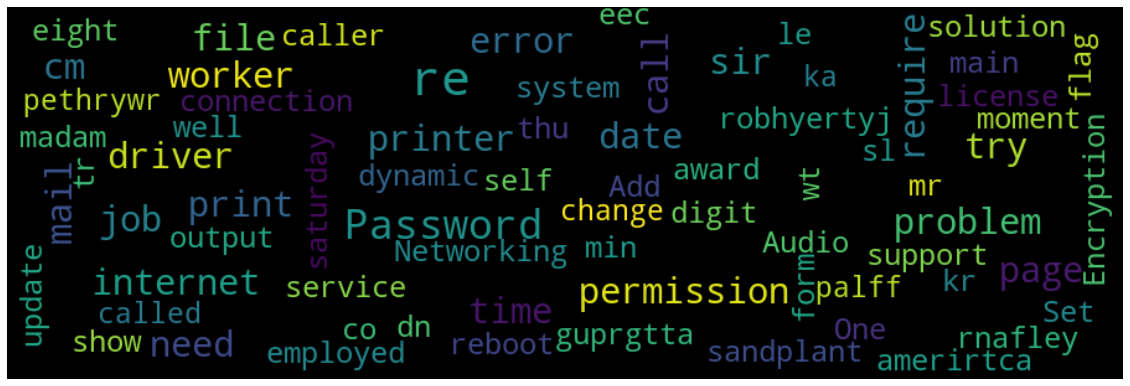

In [ ]:
wc = WordCloud(width=900, height=300, max_font_size=40, max_words=100, min_font_size=20).generate(vocabulary_wc)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

**Saving the Clean DataSet**

In [ ]:
incidentReportTransClean.to_excel(os.path.join(capstone_project_path,'incidentReportTransCleanFinal2.xlsx'))

In [ ]:
incidentReportTransCleanFinal = pd.read_excel(os.path.join(capstone_project_path,'incidentReportTransCleanFinal2.xlsx'))

# ML Models

Prepare data and labels and split them to train and test sets

In [ ]:
column_to_predict = "AssignmentGroup"
text_columns = "Description"
pca_process = True #Reduce Dimensions using PCA 
classifier = "NB"  # Supported algorithms # "SVM" # "NB"
#classifier = "SVM"  # Supported algorithms # "SVM" # "NB"
#classifier = "RandomForest"  # Supported algorithms # "SVM" # "NB"# RandomForest
use_grid_search = True  # grid search is used to find hyperparameters. Searching for hyperparameters is time consuming
fit_prior = True  # if use_stemming == True then it should be set to False ?? double check
min_data_per_class = 5 # used to determine number of samples required for each class.Classes with less than that will be excluded from the dataset. default value is 1

In [ ]:
labelData = incidentReportTransCleanFinal[column_to_predict]
data = incidentReportTransCleanFinal[text_columns]

# Split dataset into training and testing data
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labelData, test_size=0.2
)  # split data to train/test sets with 80:20 ratio

In [ ]:
data[0]

'login issue verified user detail employee manager name check user name ad reset password advise user login check caller confirm able login issue resolve'

In [ ]:
count_vect = CountVectorizer()
vectorized_data = count_vect.fit_transform(train_data)
vectorized_data.shape

(5940, 11132)

In [ ]:
tfidf = TfidfTransformer()
features = tfidf.fit_transform(vectorized_data)
features.shape

(5940, 11132)

**NB, SVM, Random Forest Model**

In [ ]:
# Fitting the training data into a data processing pipeline and eventually into the model itself
if classifier == "NB":
    print("Training NB classifier")
    # Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
    # The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
    # We will be using the 'text_clf' going forward.

    text_clf = Pipeline([
        ('vect', count_vect),
        ('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB(fit_prior=fit_prior))
    ])
    text_clf = text_clf.fit(train_data, train_labels)

Training NB classifier


In [ ]:
# Fitting the training data into a data processing pipeline and eventually into the model itself
if classifier == "SVM":
    print("Training SVM classifier")
    # Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
    # The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
    # We will be using the 'text_clf' going forward.

    text_clf = Pipeline([
        ('vect', count_vect),
        ('tfidf', TfidfTransformer()),
        ('clf', svm.SVC(kernel='rbf'))
    ])
    text_clf = text_clf.fit(train_data, train_labels)

In [ ]:
# Fitting the training data into a data processing pipeline and eventually into the model itself
if classifier == "RandomForest":
    print("Training RandomForest classifier")
    # Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
    # The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
    # We will be using the 'text_clf' going forward.

    text_clf = Pipeline([
        ('vect', count_vect),
        ('tfidf', TfidfTransformer()),
        ('clf', RandomForestClassifier(n_estimators=100))
    ])
    text_clf = text_clf.fit(train_data, train_labels)

In [ ]:
if use_grid_search:
    print("GridSearchCV Performance Tuning")
    # Grid Search
    # Here, we are creating a list of parameters for which we would like to do performance tuning.
    # All the parameters name start with the classifier name (remember the arbitrary name we gave).
    # E.g. vect__ngram_range; here we are telling to use unigram and bigrams and choose the one which is optimal.

    # NB parameters
    parameters = {
        'vect__ngram_range': [(1, 1), (1, 2)],
        'tfidf__use_idf': (True, False),
        'clf__alpha': (1e-2, 1e-3)
    }

    # Next, we create an instance of the grid search by passing the classifier, parameters
    # and n_jobs=-1 which tells to use multiple cores from user machine.
    if classifier == "NB":
      print("Training NB classifier")
      parameters = {
        'vect__ngram_range': [(1, 1), (1, 2)],
        'tfidf__use_idf': (True, False),
        'clf__alpha': (1e-2, 1e-3)
      }
      gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
    
    elif classifier == "SVM":
      print("Training SVM classifier")
      Cs = [0.01, 0.1 ] #Cs = [0.01, 0.1, 1, 10]
      gammas = [0.001, 0.01 ] #gammas = [0.001, 0.01, 0.1, 1]

      parameters = {
        'vect__ngram_range': [(1, 1), (1, 2)],
        'tfidf__use_idf': (True, False),
        'clf__C': Cs,
        'clf__gamma': gammas
      }
           
      
      gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
      
    gs_clf = gs_clf.fit(train_data, train_labels)

    # To see the best mean score and the params, run the following code
    gs_clf.best_score_
    gs_clf.best_params_

GridSearchCV Performance Tuning
Training NB classifier


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [ ]:
gs_clf.best_params_

{'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}

In [ ]:
gs_clf.best_score_

0.6254208754208754

In [ ]:
print("Evaluating model")
# Score and evaluate model on test data using model without hyperparameter tuning
predicted = text_clf.predict(test_data)
prediction_acc = np.mean(predicted == test_labels)
print("Confusion matrix without GridSearch:")
print(metrics.confusion_matrix(test_labels, predicted))
print("Mean without GridSearch: " + str(prediction_acc))

# Score and evaluate model on test data using model WITH hyperparameter tuning
if use_grid_search:
    predicted = gs_clf.predict(test_data)
    prediction_acc = np.mean(predicted == test_labels)
    print("Confusion matrix with GridSearch:")
    print(metrics.confusion_matrix(test_labels, predicted))
    print("Mean with GridSearch: " + str(prediction_acc))

Evaluating model
Confusion matrix without GridSearch:
[[734   0   0 ...   0   3   0]
 [  6   0   0 ...   0   0   0]
 [ 17   0   0 ...   0   0   0]
 ...
 [  1   0   0 ...   0   0   0]
 [ 25   0   0 ...   0  36   0]
 [ 18   0   0 ...   0   2   0]]
Mean without GridSearch: 0.5232323232323233
Confusion matrix with GridSearch:
[[670   1   0 ...   0   3   2]
 [  2   1   0 ...   0   0   0]
 [  6   0   6 ...   0   0   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  2   0   0 ...   0  45   0]
 [ 12   0   0 ...   0   2   5]]
Mean with GridSearch: 0.6067340067340067


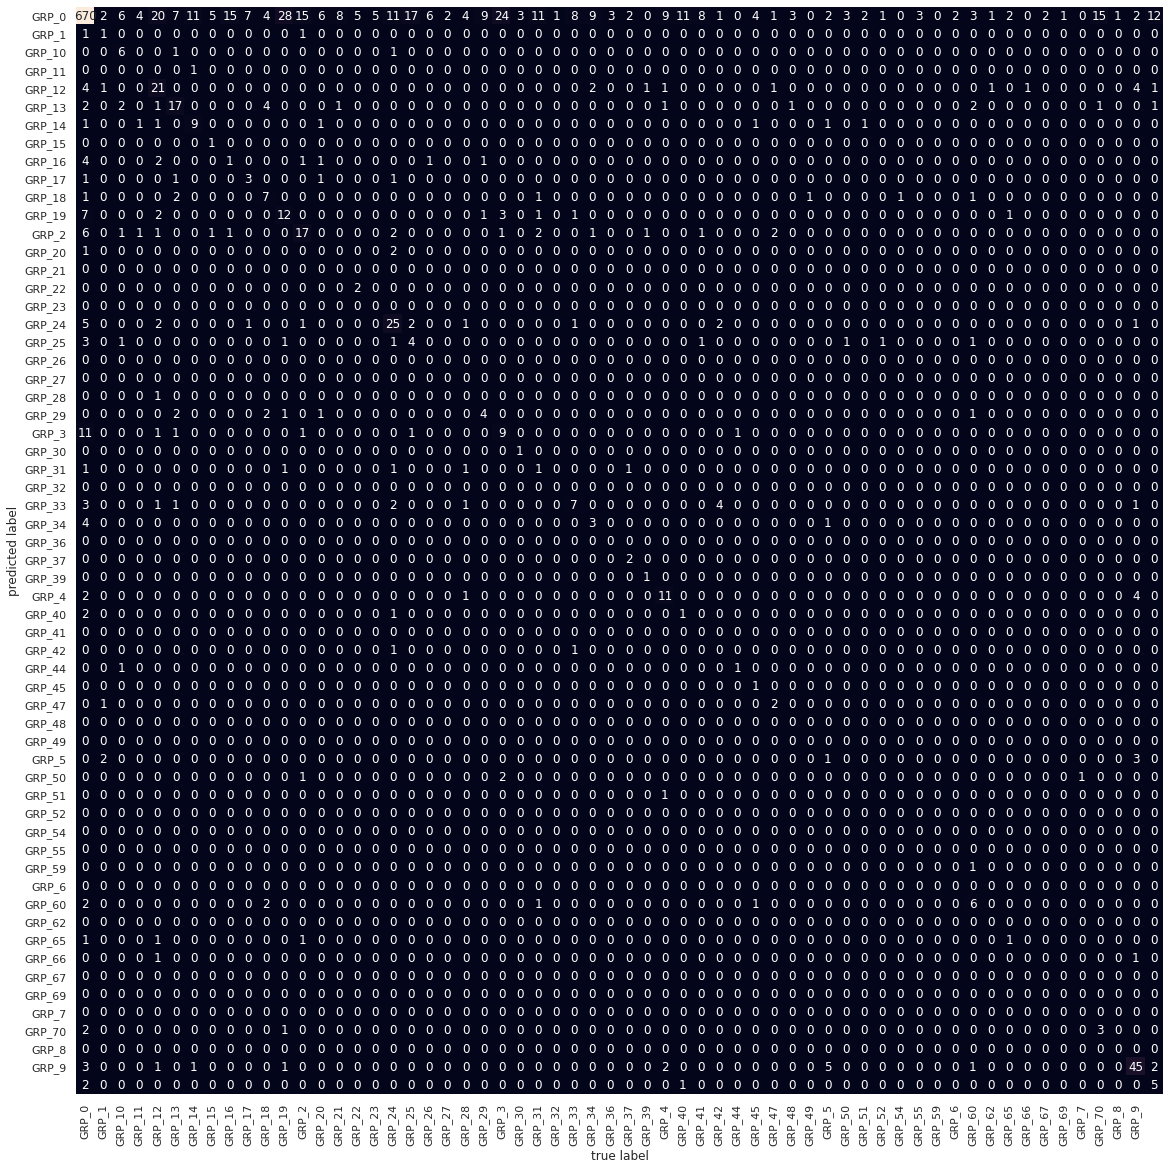

In [ ]:
# Ploting confusion matrix with 'seaborn' module
mat = metrics.confusion_matrix(test_labels, predicted)
plt.figure(figsize=(20, 20))
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(test_labels),
            yticklabels=np.unique(test_labels))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [ ]:
print(classification_report(test_labels, predicted,
                            target_names=np.unique(test_labels)))

**LSTM BiDirectional Model**

In [ ]:
max_features = 10000
maxlen = 250
embedding_size = 200

In [ ]:
tokenizer = Tokenizer(num_words=max_features,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
tokenizer.fit_on_texts(incidentReportTransCleanFinal['Description'])

In [ ]:
X = tokenizer.texts_to_sequences(incidentReportTransCleanFinal['Description'])
X = pad_sequences(X, maxlen = maxlen)
#Y = np.asarray(incidentReportTransCleanFinal['AssignmentGroup'])
Y = pd.get_dummies(incidentReportTransCleanFinal['AssignmentGroup']).values

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(Y))
print(Y[0])

In [ ]:
print(X[23])

In [ ]:
print(Y[7424])

In [ ]:
num_words=len(tokenizer.word_index)
print (num_words)

12292


In [ ]:
EMBEDDING_FILE = capstone_project_path +'/glove.6B.200d.txt'
embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

In [ ]:
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i-1] = embedding_vector

len(embeddings.values())

400000

In [ ]:
embedding_matrix.shape

(12292, 200)

In [ ]:
incidentReportTransCleanFinal.head(3).T

In [ ]:
print(embedding_matrix)

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [ ]:
input_layer = Input(shape=(maxlen,),dtype=tf.int64)
embed = Embedding(embedding_matrix.shape[0],output_dim=200,weights=[embedding_matrix],input_length=maxlen, trainable=True)(input_layer)
lstm=Bidirectional(LSTM(128))(embed)
drop=Dropout(0.3)(lstm)
dense =Dense(100,activation='relu')(drop)
flatten=Flatten()(dense)
out=Dense(Y_Train.shape[1],activation='softmax')(flatten)

In [ ]:
batch_size = 100
epochs = 20

model = Model(input_layer,out)
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 250, 200)          2458400   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               336896    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               25700     
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 74)                7474  

In [ ]:
model.fit(X_Train,Y_Train,batch_size=batch_size, epochs=epochs, verbose=1)

Train on 5940 samples
Epoch 1/20
5940/5940 [==============================] - 12s 2ms/sample - loss: 2.5595 - accuracy: 0.5077
Epoch 2/20
5940/5940 [==============================] - 4s 678us/sample - loss: 2.1533 - accuracy: 0.5508
Epoch 3/20
5940/5940 [==============================] - 4s 675us/sample - loss: 1.9436 - accuracy: 0.5773
Epoch 4/20
5940/5940 [==============================] - 4s 684us/sample - loss: 1.7569 - accuracy: 0.6027
Epoch 5/20
5940/5940 [==============================] - 4s 678us/sample - loss: 1.5662 - accuracy: 0.6293
Epoch 6/20
5940/5940 [==============================] - 4s 682us/sample - loss: 1.3875 - accuracy: 0.6623
Epoch 7/20
5940/5940 [==============================] - 4s 693us/sample - loss: 1.2280 - accuracy: 0.7007
Epoch 8/20
5940/5940 [==============================] - 4s 699us/sample - loss: 1.0747 - accuracy: 0.7320
Epoch 9/20
5940/5940 [==============================] - 4s 690us/sample - loss: 0.9693 - accuracy: 0.7539
Epoch 10/20
5940/5940 [==

In [ ]:
test_pred = model.predict(X_Test, verbose=1)

1485/1485 [==============================] - 1s 726us/sample


In [ ]:
test_pred_back = [i.argmax() for i in test_pred]

In [ ]:
Y_Test_back = [i.argmax() for i in Y_Test]

In [ ]:
acc_bidirect_lstm = accuracy_score(Y_Test_back, test_pred_back)
print(f'Accuracy Score - BiDirectional LSTM = {acc_bidirect_lstm}')

Accuracy Score - BiDirectional LSTM = 0.571043771043771


In [ ]:
metrics.confusion_matrix(Y_Test_back, test_pred_back)

array([[612,   2,   1, ...,   0,   0,   0],
       [  2,   2,   0, ...,   0,   0,   0],
       [  3,   0,   3, ...,   0,   1,   0],
       ...,
       [  2,   0,   0, ...,   0,   0,   0],
       [  4,   1,   0, ...,   0,  44,   0],
       [  3,   0,   0, ...,   0,   1,   5]])

In [ ]:
print(classification_report(Y_Test_back, test_pred_back))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       732
           1       0.29      0.33      0.31         6
           2       0.50      0.20      0.29        15
           3       0.00      0.00      0.00         5
           4       0.61      0.44      0.51        57
           5       0.60      0.36      0.45        25
           6       0.38      0.32      0.35        25
           7       0.25      0.10      0.14        10
           8       0.53      0.36      0.43        22
           9       0.75      0.23      0.35        13
          10       0.32      0.29      0.30        21
          11       0.26      0.18      0.22        38
          12       0.39      0.43      0.41        46
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         1
          17       0.58    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Multiclass Text Classification Using BERT and Keras

## STEP 1:  Load and Preprocess the Dataset



In [ ]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(incidentReportTransCleanFinal, 
                                                                   'Description', # name of column containing review text
                                                                   label_columns=['AssignmentGroup'],
                                                                   maxlen=250, 
                                                                   max_features=10000,
                                                                   preprocess_mode='bert',
                                                                   val_pct=0.1,
                                                                   ngram_range=3)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


## STEP 2:  Load the BERT Model and Instantiate a Learner object

In [ ]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), batch_size=6)

Is Multi-Label? False
maxlen is 250
done.


## STEP 3: Train the Model

In [ ]:
learner.fit_onecycle(2e-5, 8)



begin training using onecycle policy with max lr of 2e-05...
Train on 6682 samples
Epoch 1/8
6682/6682 [==============================] - 653s 98ms/sample - loss: 2.5088 - accuracy: 0.5133
Epoch 2/8
6682/6682 [==============================] - 632s 95ms/sample - loss: 1.9453 - accuracy: 0.5760
Epoch 3/8
6682/6682 [==============================] - 633s 95ms/sample - loss: 1.6178 - accuracy: 0.6311
Epoch 4/8
6682/6682 [==============================] - 634s 95ms/sample - loss: 1.3133 - accuracy: 0.6865
Epoch 5/8
6682/6682 [==============================] - 633s 95ms/sample - loss: 1.0254 - accuracy: 0.7532
Epoch 6/8
6682/6682 [==============================] - 632s 95ms/sample - loss: 0.7516 - accuracy: 0.8186
Epoch 7/8
6682/6682 [==============================] - 631s 94ms/sample - loss: 0.5510 - accuracy: 0.8676
Epoch 8/8
6682/6682 [==============================] - 630s 94ms/sample - loss: 0.4266 - accuracy: 0.8905


In [ ]:
y_test_back = [i.argmax() for i in y_test]

In [ ]:
learner.validate(val_data=(x_test, y_test), class_names=np.unique(y_test_back).all())

              precision    recall  f1-score   support

           0       0.75      0.85      0.79       379
           1       0.00      0.00      0.00         3
           2       0.25      0.29      0.27         7
           3       1.00      0.25      0.40         4
           4       0.53      0.63      0.58        27
           5       0.41      0.53      0.46        17
           6       0.40      0.43      0.41        14
           7       0.50      0.40      0.44         5
           8       0.29      0.22      0.25         9
           9       0.50      0.50      0.50         2
          10       0.50      0.62      0.56         8
          11       0.50      0.33      0.40        21
          12       0.58      0.37      0.45        30
          13       0.00      0.00      0.00         4
          14       0.50      0.50      0.50         2
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       0.78    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


array([[321,   0,   3, ...,   2,   2,   1],
       [  1,   0,   0, ...,   0,   0,   0],
       [  1,   0,   2, ...,   0,   0,   0],
       ...,
       [  2,   0,   0, ...,   5,   0,   0],
       [  0,   0,   0, ...,   0,  18,   0],
       [  1,   0,   0, ...,   0,   0,   3]])

## Use Our Trained BERT Model



In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
predictor.get_classes()

In [ ]:
test_data.iloc[144]

'outlook freeze user outlook freeze user'

In [ ]:
test_labels.iloc[144]

'GRP_4'

In [ ]:
#predictor.predict(test_data.iloc[1484].astype(str).values.tolist())
predictor.predict(test_data.iloc[144])

'GRP_19'

In [ ]:
#print(test_labels.iloc[144])

In [ ]:
# let's save the predictor for later use
predictor.save(os.path.join(capstone_project_path,'/my_predictor'))

In [ ]:
# reload the predictor
reloaded_predictor = ktrain.load_predictor(os.path.join(capstone_project_path,'/my_predictor'))

In [ ]:
reloaded_predictor.predict(test_data.iloc[54].astype(str).values.tolist())

In [ ]:
print(test_labels.iloc[54])